In [2]:
filename = "/Users/naah5403/PyScripts/ElectricField/Tevents.csv"  # Change the path to file in your computer
rows = []
with open(filename, "r") as f:
    for line in f:
        rows.append(line.split(","))


In [3]:
import os
# path for data 
os.environ["SPEDAS_DATA_DIR"] = "/Volumes/datadir/mmsdata" # "/Users/naah5403/data" 

In [4]:
print(rows[0][0],rows[1][0])

2017-05-28/03:55:25.065 2017-05-28/03:55:25.612


In [5]:
import numpy as np
trange = np.empty(len(rows[0]), dtype=object)
for i in range(0,len(rows[0])):
    trange[i] = [rows[0][i],rows[1][i]]

In [6]:
trange[0:10]

array([list(['2017-05-28/03:55:25.065', '2017-05-28/03:55:25.612']),
       list(['2017-05-28/03:55:40.971', '2017-05-28/03:55:41.596']),
       list(['2017-05-28/03:55:57.925', '2017-05-28/03:55:58.659']),
       list(['2017-05-28/03:57:08.035', '2017-05-28/03:57:08.801']),
       list(['2017-05-28/03:57:10.051', '2017-05-28/03:57:10.738']),
       list(['2017-05-28/03:57:10.769', '2017-05-28/03:57:11.738']),
       list(['2017-05-28/03:57:11.551', '2017-05-28/03:57:12.316']),
       list(['2017-05-28/03:57:12.316', '2017-05-28/03:57:13.191']),
       list(['2017-05-28/03:57:13.160', '2017-05-28/03:57:13.691']),
       list(['2017-05-28/03:57:13.926', '2017-05-28/03:57:14.316'])],
      dtype=object)

In [7]:
import pyspedas
from pytplot import tplot, del_data, options, get_data, store_data, ylim, tplot_options, tlimit, tplot_names
from pytplot.tplot_math import tdotp, tcrossp
import matplotlib.pyplot as plt

29-Oct-25 13:26:14: Loading /Volumes/datadir/mmsdata/mms/mms1/edp/brst/l2/dce/2017/05/28/mms1_edp_brst_l2_dce_20170528035333_v3.0.0.cdf
29-Oct-25 13:26:17: Loading /Volumes/datadir/mmsdata/mms/mms1/edp/fast/l2/dce/2017/05/mms1_edp_fast_l2_dce_20170528_v3.0.1.cdf


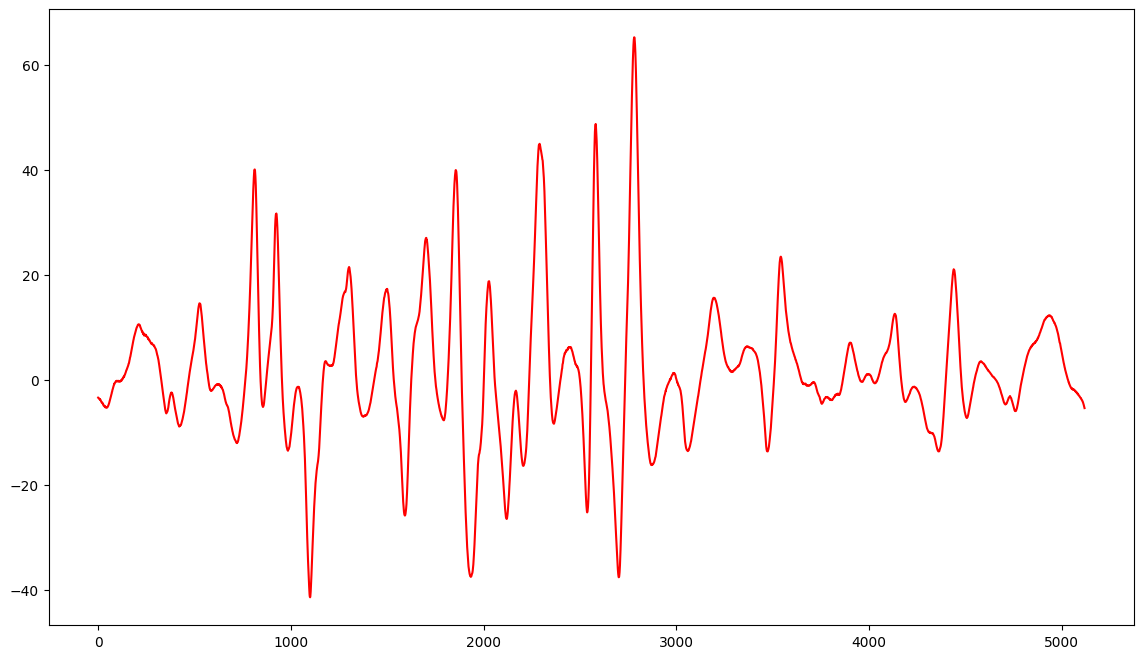

In [43]:
k=1
probe='1'
pyspedas.mms.edp(trange=trange[k], data_rate='brst', probe=probe, datatype=['dce'], time_clip=True)
pyspedas.mms.edp(trange=trange[k], data_rate='fast', probe=probe, datatype=['dce'], time_clip=True)
# tplot(['mms1_edp_dce_par_epar_brst_l2'])

Eparb = get_data('mms1_edp_dce_par_epar_brst_l2')
Eparf = get_data('mms1_edp_dce_par_epar_fast_l2')
plt.figure(figsize=(14, 8))
plt.tight_layout()
plt.plot(Eparb.y[:,1], 'r')
# plt.plot(Eparf.y[:,2], 'k')

In [48]:
import numpy as np
import pandas as pd

# --- Configuration ---
NUM_SIGNALS = 100


signals_data = []
probe='1'
# Generate the 100 signals
for i in range(NUM_SIGNALS):
    pyspedas.mms.edp(trange=trange[i], data_rate='brst', probe=probe, datatype=['dce'], time_clip=True)

    Eparb = get_data('mms1_edp_dce_par_epar_brst_l2')

    # Generate the signal
    dimension = Eparb.y[:,1].shape[0]
    signal = Eparb.y[:,1]

    # Store the signal and its metadata
    signals_data.append({
        'signal_id': i,
        'dimension': dimension,
        'time_series': signal  # The actual NumPy array of the signal
    })

# --- Structure the Dataset ---
# For a dataset where signals have different dimensions, a common structure
# is a list of dictionaries or a Pandas DataFrame where the signal itself is
# stored as a NumPy array or list inside a column.

# Convert the list of dictionaries to a Pandas DataFrame
df_signals = pd.DataFrame(signals_data)

# --- Display Example Signals and Summary ---
print("--- Dataset Summary ---")
print(f"Total signals generated: {NUM_SIGNALS}")


29-Oct-25 13:50:52: Loading /Volumes/datadir/mmsdata/mms/mms1/edp/brst/l2/dce/2017/05/28/mms1_edp_brst_l2_dce_20170528035333_v3.0.0.cdf
29-Oct-25 13:50:54: Loading /Volumes/datadir/mmsdata/mms/mms1/edp/brst/l2/dce/2017/05/28/mms1_edp_brst_l2_dce_20170528035333_v3.0.0.cdf
29-Oct-25 13:50:56: Loading /Volumes/datadir/mmsdata/mms/mms1/edp/brst/l2/dce/2017/05/28/mms1_edp_brst_l2_dce_20170528035543_v3.0.0.cdf
29-Oct-25 13:50:59: Loading /Volumes/datadir/mmsdata/mms/mms1/edp/brst/l2/dce/2017/05/28/mms1_edp_brst_l2_dce_20170528035543_v3.0.0.cdf
29-Oct-25 13:51:01: Loading /Volumes/datadir/mmsdata/mms/mms1/edp/brst/l2/dce/2017/05/28/mms1_edp_brst_l2_dce_20170528035543_v3.0.0.cdf
29-Oct-25 13:51:03: Loading /Volumes/datadir/mmsdata/mms/mms1/edp/brst/l2/dce/2017/05/28/mms1_edp_brst_l2_dce_20170528035543_v3.0.0.cdf
29-Oct-25 13:51:05: Loading /Volumes/datadir/mmsdata/mms/mms1/edp/brst/l2/dce/2017/05/28/mms1_edp_brst_l2_dce_20170528035543_v3.0.0.cdf
29-Oct-25 13:51:07: Loading /Volumes/datadir/mms

--- Dataset Summary ---
Total signals generated: 100


In [49]:
print("\n--- Example Signals and Metadata ---")
print(df_signals[['signal_id', 'dimension']].head())
example_signal = df_signals.loc[0, 'time_series']
print(f"Signal 0 (Dimension: {df_signals.loc[0, 'dimension']}):")
print(example_signal[:5])
print("...")


--- Example Signals and Metadata ---
   signal_id  dimension
0          0       4481
1          1       5120
2          2       6013
3          3       6275
4          4       5628
Signal 0 (Dimension: 4481):
[4.218142  4.187014  4.2369833 4.2725954 4.2770786]
...


Applied MinMax scaling to all signals.


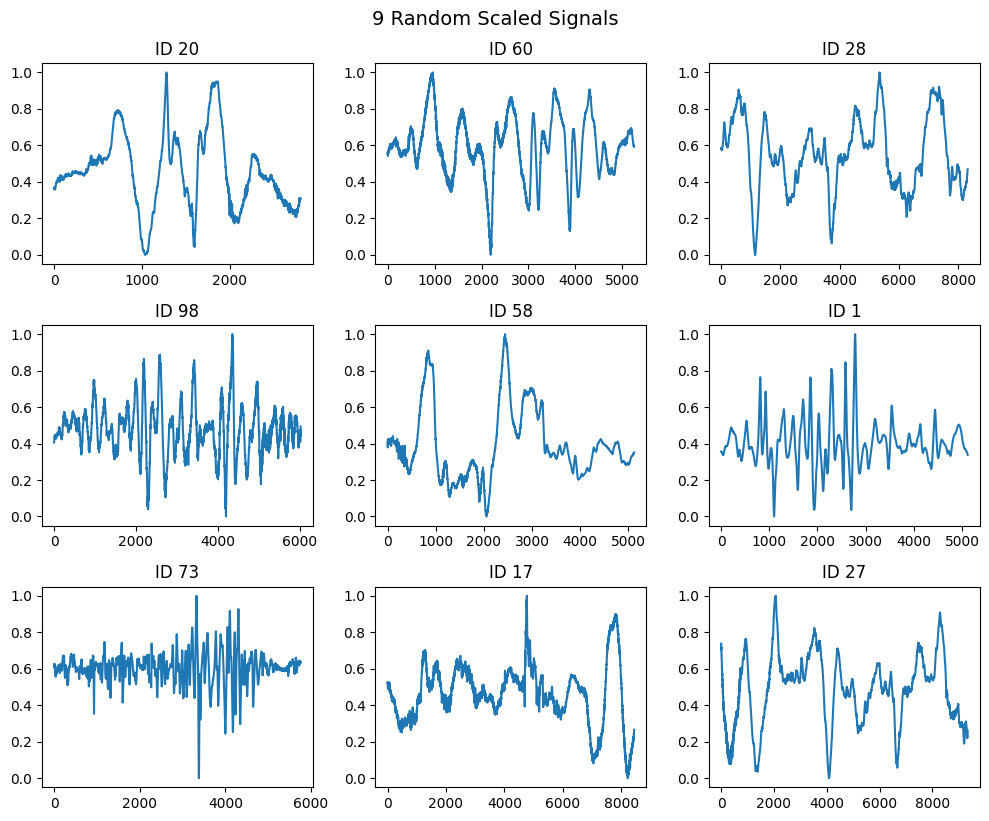

Displayed 9 sample signals.
DTW distance matrix computed for 100 signals.
Assigned clusters: {1, 2, 3, 4}


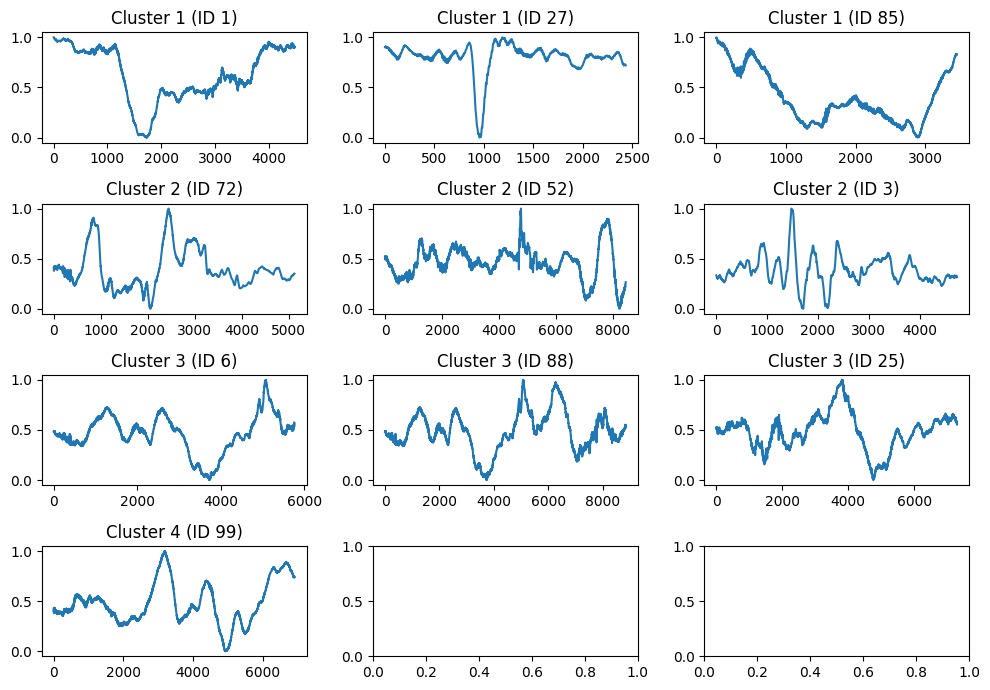

Cluster visualization complete.


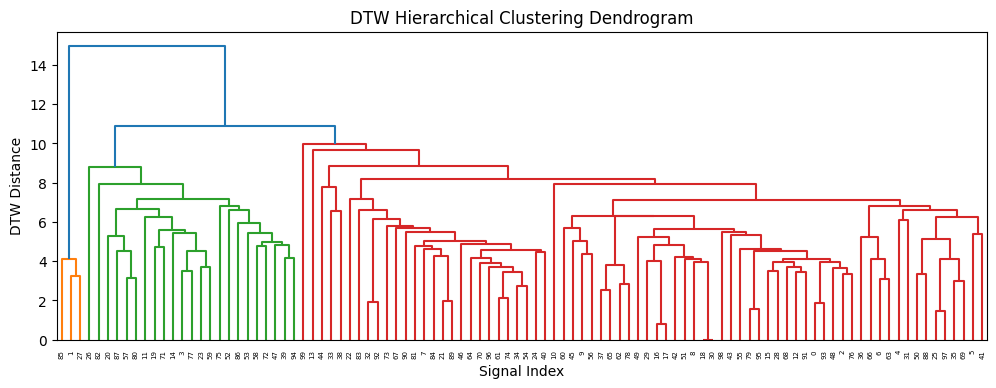

Dendrogram plotted.


In [51]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tslearn.metrics import dtw
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.spatial.distance import squareform
import random

# --------------------------------
# 1. MinMax Scale Each Signal Individually
# --------------------------------
scaled_signals = []
for sig in df_signals["time_series"]:
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(sig.reshape(-1, 1)).flatten()
    scaled_signals.append(scaled)

df_signals["scaled_signal"] = scaled_signals
print("Applied MinMax scaling to all signals.")


# --------------------------------
# 2. Plot 9 Random Signals
# --------------------------------
sample_indices = random.sample(range(len(df_signals)), 9)

plt.figure(figsize=(10, 8))
for i, idx in enumerate(sample_indices):
    plt.subplot(3, 3, i + 1)
    plt.plot(df_signals.loc[idx, "scaled_signal"])
    plt.title(f"ID {idx}")
    plt.tight_layout()
plt.suptitle("9 Random Scaled Signals", fontsize=14, y=1.02)
plt.show()
print("Displayed 9 sample signals.")


# --------------------------------
# 3. DTW Distance Matrix (subset for speed)
# --------------------------------
N = 100  # sample subset to keep computation reasonable
subset = df_signals.sample(N, random_state=42).reset_index(drop=True)

D = np.zeros((N, N))
for i in range(N):
    for j in range(i+1, N):
        dist = dtw(subset.loc[i, "scaled_signal"], subset.loc[j, "scaled_signal"])
        D[i, j] = D[j, i] = dist

print("DTW distance matrix computed for", N, "signals.")


# --------------------------------
# 4. Hierarchical Clustering using DTW distances
# --------------------------------
Z = linkage(squareform(D), method='average')
K = 4
labels = fcluster(Z, K, criterion='maxclust')
subset["cluster"] = labels

print("Assigned clusters:", set(labels))


# --------------------------------
# 5. Visualize cluster members
# --------------------------------
fig, axes = plt.subplots(K, 3, figsize=(10, 7))
for k in range(1, K+1):
    members = subset[subset["cluster"] == k]
    sample_members = members.sample(min(3, len(members)), random_state=42)

    for j, (idx, row) in enumerate(sample_members.iterrows()):
        axes[k-1, j].plot(row["scaled_signal"])
        axes[k-1, j].set_title(f"Cluster {k} (ID {idx})")

plt.tight_layout()
plt.show()
print("Cluster visualization complete.")


# --------------------------------
# 6. Optional: Dendrogram visualization
# --------------------------------
plt.figure(figsize=(12, 4))
dendrogram(Z, color_threshold=0.7 * max(Z[:, 2]))
plt.title("DTW Hierarchical Clustering Dendrogram")
plt.xlabel("Signal Index")
plt.ylabel("DTW Distance")
plt.show()
print("Dendrogram plotted.")


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans
from tslearn.clustering import silhouette_score

# -------------------------------
# Convert dataframe → numpy list of time series
# -------------------------------
signals_list = df_signals['time_series'].tolist()

# Convert into 3D array expected by tslearn: (n_samples, timesteps, 1)
# tslearn supports variable lengths implicitly
X = np.array([s.reshape(-1,1) for s in signals_list], dtype=object)

# -------------------------------
# Normalize each signal individually
# -------------------------------
scaler = TimeSeriesScalerMeanVariance()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# DTW KMeans Clustering
# -------------------------------
n_clusters = 4  # Try 4 based on FREQ groups; can tune later

model = TimeSeriesKMeans(
    n_clusters=n_clusters,
    metric="dtw",
    max_iter=50,
    random_state=42,
    n_jobs=-1
)

labels = model.fit_predict(X_scaled)
centroids = model.cluster_centers_

# -------------------------------
# Add labels to dataframe
# -------------------------------
df_signals['cluster'] = labels

# -------------------------------
# Silhouette Score (DTW distance)
# -------------------------------
sil = silhouette_score(X_scaled, labels, metric="dtw")
print(f"\nSilhouette Score: {sil:.3f}")

# -------------------------------
# Plot clusters with centroids
# -------------------------------
plt.figure(figsize=(15,10))
for c in range(n_clusters):
    plt.subplot(2, 2, c+1)
    for i, x in enumerate(X_scaled[labels == c]):
        plt.plot(x.ravel(), alpha=0.20)
    plt.plot(centroids[c].ravel(), linewidth=3, label=f"Centroid {c}")
    plt.title(f"Cluster {c}")
    plt.legend()

plt.tight_layout()
plt.show()


29-Oct-25 14:40:41: /opt/anaconda3/lib/python3.12/site-packages/executing/executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),

29-Oct-25 14:40:41: /opt/anaconda3/lib/python3.12/ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)



ValueError: setting an array element with a sequence.

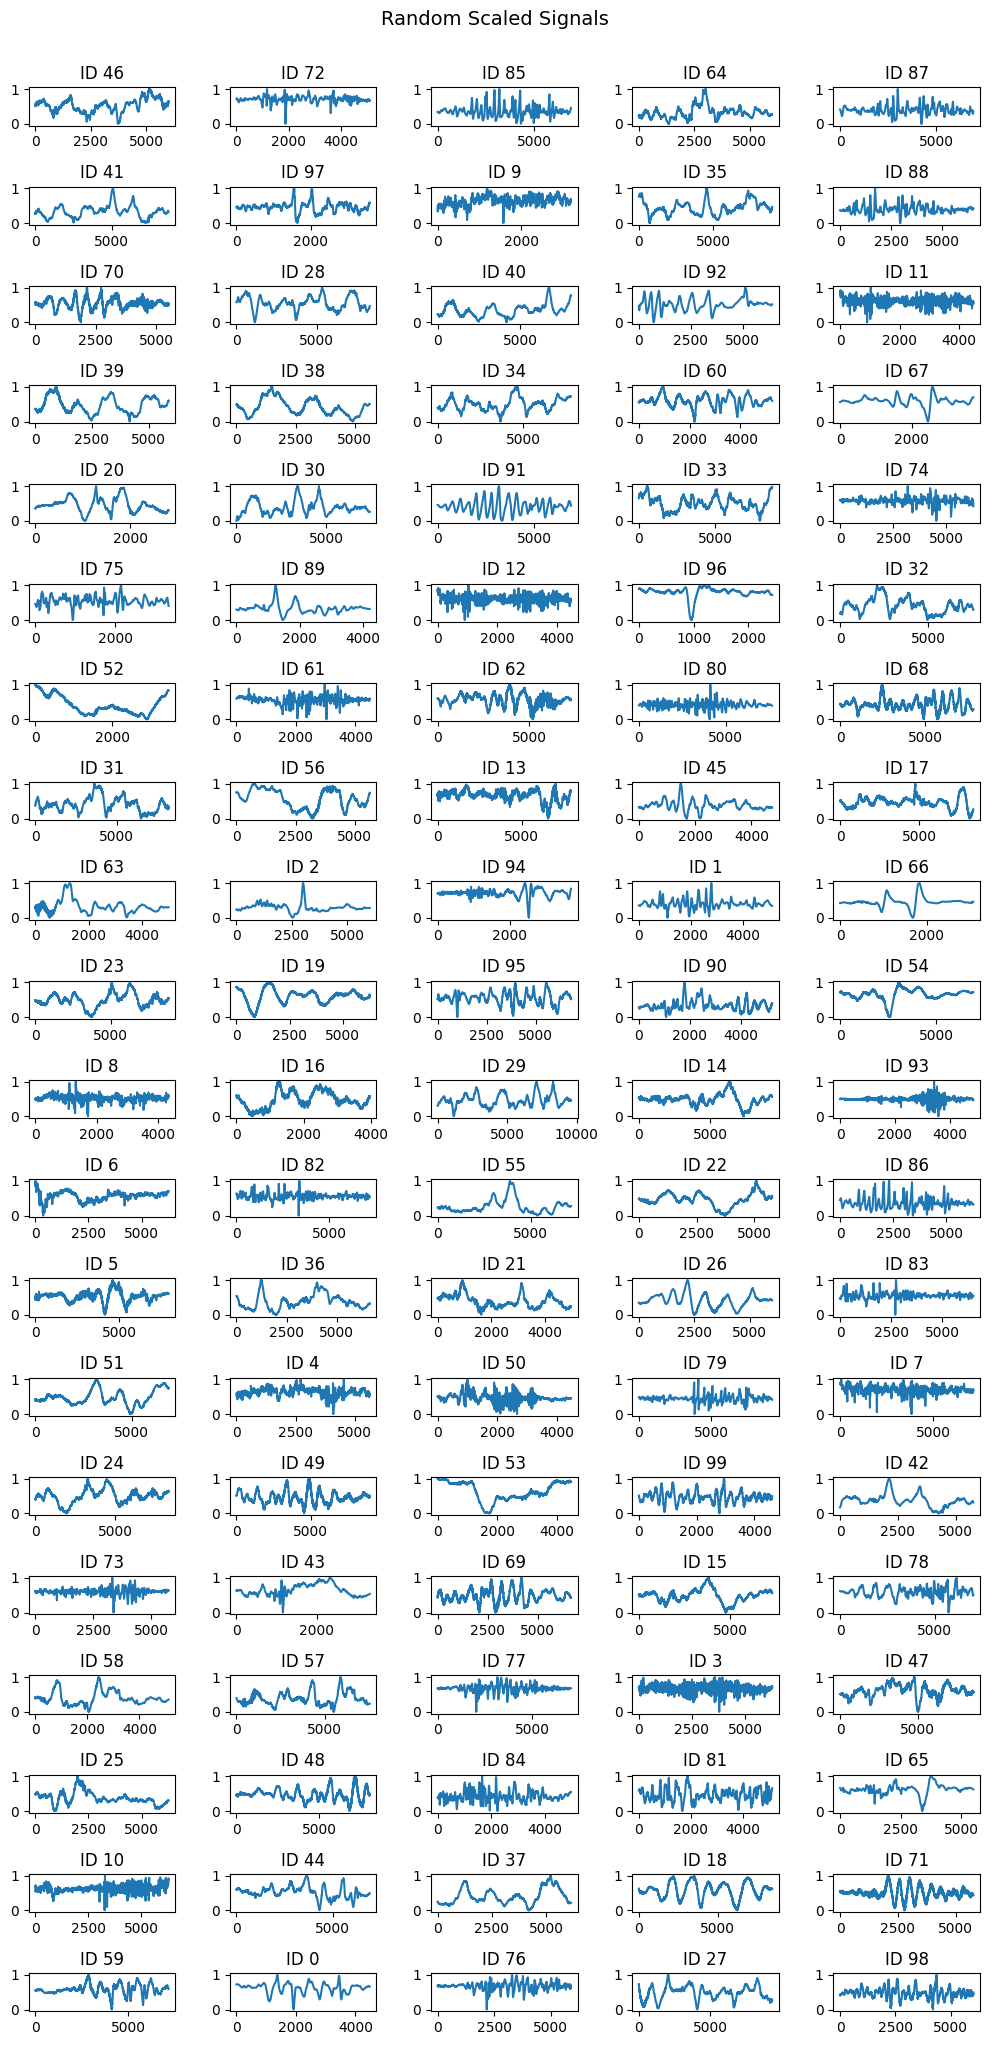

Displayed sample signals.


In [62]:
# --------------------------------
# 2. Plot Random Signals
# --------------------------------
sample_indices = random.sample(range(len(df_signals)), 100)

plt.figure(figsize=(10, 20))
for i, idx in enumerate(sample_indices):
    plt.subplot(20, 5, i + 1)
    plt.plot(df_signals.loc[idx, "scaled_signal"])
    plt.title(f"ID {idx}")
    plt.tight_layout()
plt.suptitle("Random Scaled Signals", fontsize=14, y=1.02)
plt.show()
print("Displayed sample signals.")


In [71]:
0.68*150000./12

8500.000000000002